# Correlations

In [1]:
#import libriaries
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import datetime
import plotly.express as px
import sqlite3
import os
import sqlite3

#Destination folder
os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

# Create your connection.
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

,Date,Gold,Covid19,Sp500
2590,2020-04-20 00:00:00,1686.20,2355774.0,2823.16
2591,2020-04-21 00:00:00,1682.05,2433048.0,2736.56
2592,2020-04-22 00:00:00,1710.55,2520435.0,2799.31
2593,2020-04-23 00:00:00,1736.25,2588064.0,2797.80
2594,2020-04-24 00:00:00,1715.90,2668137.0,2836.74


# SP500 correlations

In [ ]:
#Get SQLLite select statement SP500 index and indicators
df = pd.read_sql_query("""select SP."Date",g."Index" as Gold, C19."Index" Covid19, SP."Index" as Sp500
 from SP500 as SP
  LEFT OUTER JOIN Covid19 as C19 ON SP.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON SP.Date=g.Date
Where SP.Date IS NOT NULL
""", conn)
df.tail()

,Gold,Covid19,Sp500
Gold,1.000000,0.710201,-0.240904
Covid19,0.710201,1.000000,-0.440957
Sp500,-0.240904,-0.440957,1.000000


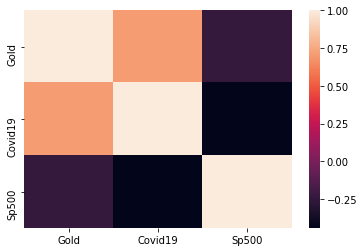

In [24]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df.corr()

# Boening correlations

In [9]:
#Get SQLLite select statement Boening stock prices and indicators
df2 = pd.read_sql_query("""select bo."Date", co."Index" as Crude_Oil, C19."Index" as Covid19, bo."Index" as Boeining
 from Boening as bo
  LEFT OUTER JOIN Covid19 as C19 ON bo.Date = C19.Date
  LEFT OUTER JOIN crude_oil as co ON bo.Date=co.Date
Where bo."Index" IS NOT NULL
""", conn)

df2.tail()

,Date,Crude_Oil,Covid19,Boeining
2590,2020-04-20 00:00:00,NaN,2355774.0,143.61
2591,2020-04-21 00:00:00,NaN,2433048.0,136.33
2592,2020-04-22 00:00:00,NaN,2520435.0,134.97
2593,2020-04-23 00:00:00,NaN,2588064.0,137.74
2594,2020-04-24 00:00:00,NaN,2668137.0,128.98


,Crude_Oil,Covid19,Boeining
Crude_Oil,1.000000,-0.717002,-0.462378
Covid19,-0.717002,1.000000,-0.668084
Boeining,-0.462378,-0.668084,1.000000


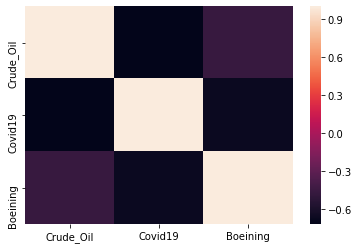

In [27]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df2.corr()

# Exxon mobil correlations

In [17]:
#Get SQLLite select statement Exxon_mobil stock prices and indicators
df3 = pd.read_sql_query("""select em."Date", co."Index" as Crude_Oil, g."Index" as Gold, em."Index" as Exxon_mobil
 from Exxon_mobil as em
  LEFT OUTER JOIN Gold as g ON em.Date = g.Date
  LEFT OUTER JOIN crude_oil as co ON em.Date=co.Date
Where em."Index" IS NOT NULL
""", conn)


,Date,Crude_Oil,Gold,Exxon_mobil
2590,2020-04-20 00:00:00,NaN,1686.20,41.18
2591,2020-04-21 00:00:00,NaN,1682.05,40.96
2592,2020-04-22 00:00:00,NaN,1710.55,42.13
2593,2020-04-23 00:00:00,NaN,1736.25,43.45
2594,2020-04-24 00:00:00,NaN,1715.90,43.73


,Crude_Oil,Gold,Exxon_mobil
Crude_Oil,1.000000,0.437870,0.375791
Gold,0.437870,1.000000,-0.055359
Exxon_mobil,0.375791,-0.055359,1.000000


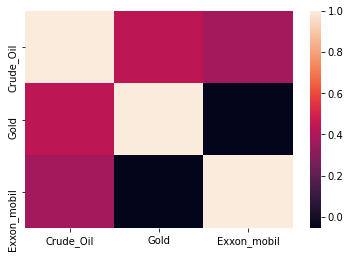

In [30]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df3.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df3.corr()

# Alaska air group correlations

In [20]:
#Get SQLLite select statement Alaska air group stock prices and indicators
df4 = pd.read_sql_query("""select ag."Date", co."Index" as Crude_Oil, C19."Index" as Covid19, ag."Index" as Alaska_Air_Group
 from Alaska_Air_Group as ag
   LEFT OUTER JOIN Covid19 as C19 ON ag.Date = C19.Date
  LEFT OUTER JOIN crude_oil as co ON ag.Date=co.Date
Where ag."Index" IS NOT NULL
""", conn)
df4.tail()

,Date,Crude_Oil,Covid19,Alaska_Air_Group
2590,2020-04-20 00:00:00,NaN,2355774.0,29.23
2591,2020-04-21 00:00:00,NaN,2433048.0,28.29
2592,2020-04-22 00:00:00,NaN,2520435.0,27.53
2593,2020-04-23 00:00:00,NaN,2588064.0,28.20
2594,2020-04-24 00:00:00,NaN,2668137.0,28.01


,Crude_Oil,Covid19,Alaska_Air_Group
Crude_Oil,1.000000,-0.717002,-0.763589
Covid19,-0.717002,1.000000,-0.680803
Alaska_Air_Group,-0.763589,-0.680803,1.000000


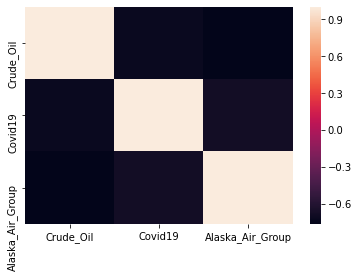

In [29]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df4.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df4.corr()